In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df = pd.read_csv("refined_dataset.csv")

In [11]:
df.describe()

,location_id,direction,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,...,hour_21,hour_22,hour_23,hour_24,sum,rain,temperature,year,weekday,week
count,111151.00000,111151.000000,111151.000000,111151.000000,111151.000000,111151.000000,111151.000000,111151.000000,111151.000000,111151.000000,...,111151.000000,111151.000000,111151.000000,111151.000000,111151.000000,111151.000000,111151.000000,111151.000000,111151.000000,111151.000000
mean,545.87849,1.501363,11.871067,7.865579,5.704150,6.044705,9.887450,28.797906,83.573274,114.028439,...,56.458655,42.005398,27.865021,18.236012,1719.405125,1.334841,6.563847,2013.401625,2.988295,25.804320
std,589.28766,0.500000,33.684541,21.478568,14.161849,14.317540,24.689969,90.216812,288.812266,406.065957,...,168.064059,120.824131,78.958087,53.252970,4890.540468,4.382747,8.839309,2.344274,1.999662,14.970023
min,110.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,-22.700000,2010.000000,0.000000,1.000000
25%,110.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,29.000000,-1.000000,0.800000,2011.000000,1.000000,13.000000
50%,168.00000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,5.000000,...,4.000000,3.000000,2.000000,1.000000,115.000000,-1.000000,6.100000,2013.000000,3.000000,25.000000
75%,1403.00000,2.000000,5.000000,4.000000,4.000000,4.000000,5.000000,9.000000,17.000000,23.000000,...,14.000000,12.000000,8.000000,6.000000,477.000000,1.700000,14.100000,2015.000000,5.000000,39.000000
max,1403.00000,2.000000,734.000000,660.000000,634.000000,222.000000,425.000000,1210.000000,2436.000000,3074.000000,...,2863.000000,2409.000000,1689.000000,1089.000000,30295.000000,52.000000,25.700000,2018.000000,6.000000,53.000000


In [12]:
df.head()

,location_id,location_name,date,direction,vehicle_type,hour_1,hour_2,hour_3,hour_4,hour_5,...,hour_22,hour_23,hour_24,sum,rain,temperature,year,weekday,week,midsummer_week
0,168,Askisto,2013/12/01,1,11 HA-PA,123.0,124.0,80.0,71.0,123.0,...,292.0,222.0,94.0,12588.0,0.9,2.0,2013,5,2,False
1,168,Askisto,2013/12/01,1,12 KAIP,2.0,1.0,1.0,1.0,0.0,...,5.0,1.0,8.0,133.0,0.9,2.0,2013,5,2,False
2,168,Askisto,2013/12/01,1,13 Linja-autot,1.0,2.0,1.0,1.0,0.0,...,3.0,2.0,1.0,48.0,0.9,2.0,2013,5,2,False
3,168,Askisto,2013/12/01,1,14 KAPP,0.0,0.0,0.0,0.0,1.0,...,12.0,19.0,6.0,121.0,0.9,2.0,2013,5,2,False
4,168,Askisto,2013/12/01,1,15 KATP,0.0,0.0,0.0,0.0,1.0,...,9.0,12.0,7.0,103.0,0.9,2.0,2013,5,2,False


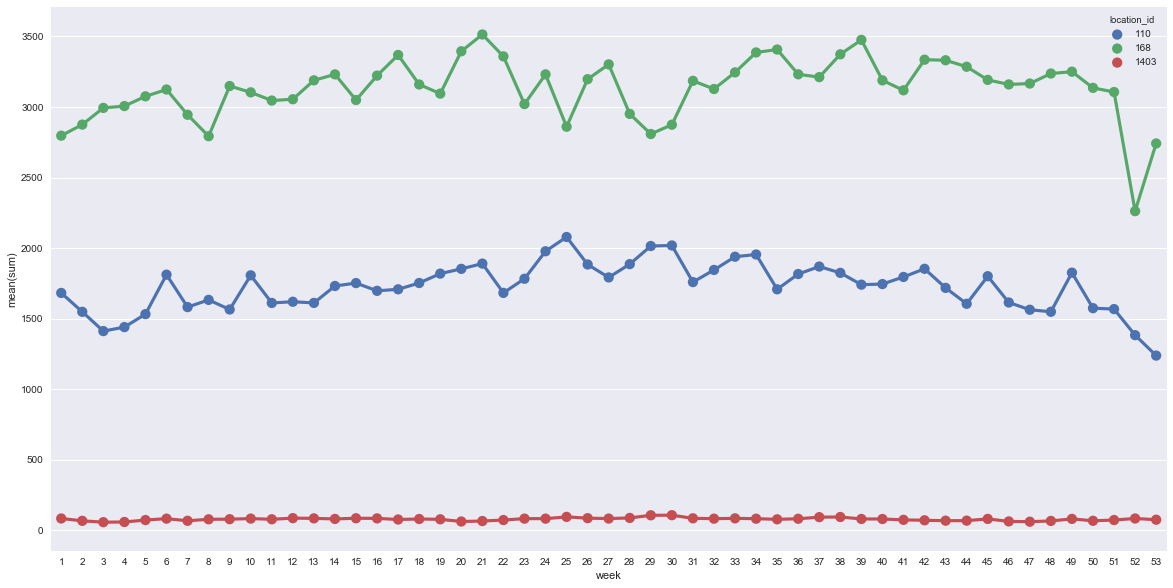

In [33]:
# compare weekly volumes in each location
weekly = df.groupby(by=["week", "location_id"]).agg({"sum": "mean"}).reset_index()
fig, ax = plt.subplots(figsize=(20, 10))
sns.pointplot(x="week", y="sum", hue="location_id", data=weekly, ax=ax)

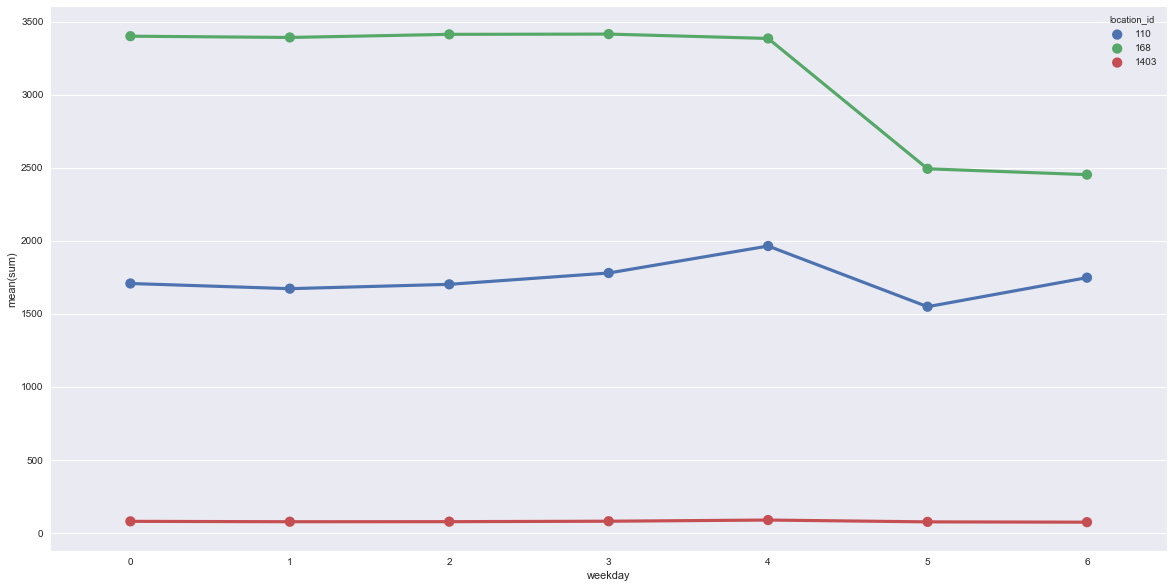

In [41]:
# compare average week volumes in each location
week_avg = df.groupby(by=["weekday", "location_id"]).agg({"sum": "mean"}).reset_index()
fig, ax = plt.subplots(figsize=(20, 10))
sns.pointplot(x="weekday", y="sum", hue="location_id", data=week_avg, ax=ax)

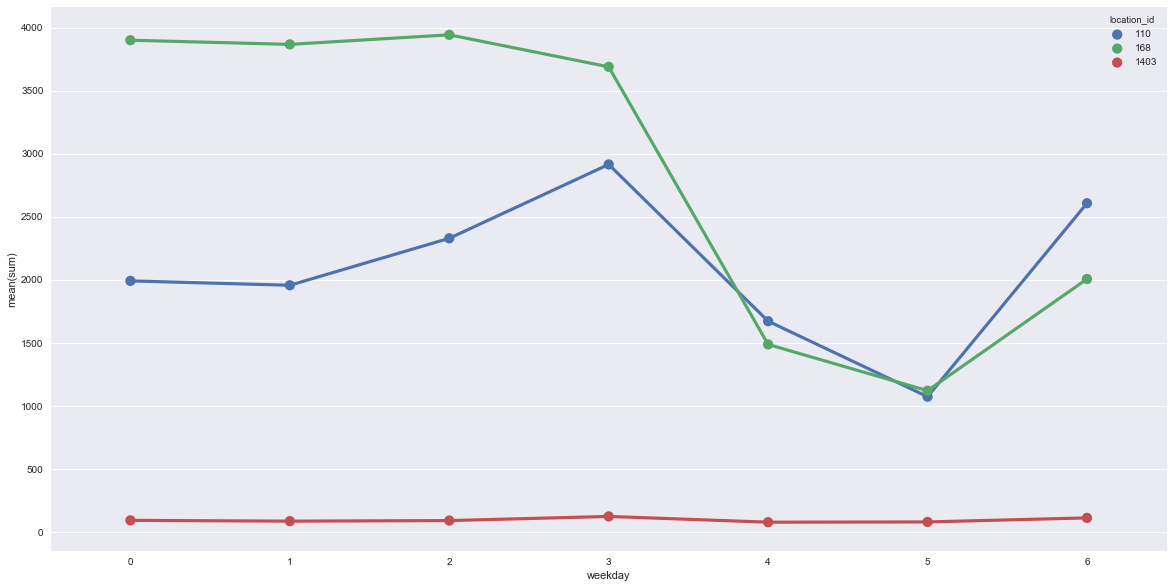

In [39]:
# compare midsummer week volumes in each location
midsummer = df[df["midsummer_week"] == True]
midsummer = midsummer.groupby(by=["weekday", "location_id"]).agg({"sum": "mean"}).reset_index()
fig, ax = plt.subplots(figsize=(20, 10))
sns.pointplot(x="weekday", y="sum", hue="location_id", data=midsummer, ax=ax)

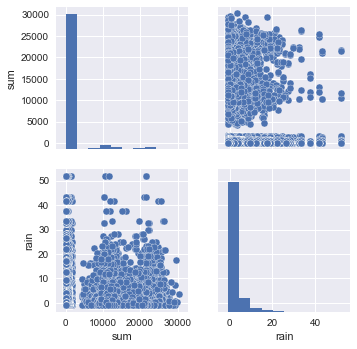

In [43]:
# 
d = df.groupby([""])
sns.pairplot(df[["sum", "rain"]])